# "Unveiling Insights: Exploratory Data Analysis and Visualizing COVID-19 Trends in India" 

In [1]:
import pandas as pd
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
state_df = pd.read_csv('D:\StatewiseTestingDetails.csv')
country_df = pd.read_csv('D:\covid_19_india.csv')

In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


In [5]:
country_df.shape

(18110, 9)

In [6]:
country_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
state_df.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [8]:
state_df.shape

(16336, 5)

In [9]:
country_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [10]:
state_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [11]:
country_df['Active_cases']=country_df['Confirmed']-(country_df['Cured']+country_df['Deaths'])

In [12]:
state_df[state_df['State']=='Tamil Nadu'].tail()

,Date,State,TotalSamples,Negative,Positive
13991,2021-08-06,Tamil Nadu,38371633.0,NaN,NaN
13992,2021-08-07,Tamil Nadu,38536958.0,NaN,NaN
13993,2021-08-08,Tamil Nadu,38697187.0,NaN,NaN
13994,2021-08-09,Tamil Nadu,38851889.0,NaN,NaN
13995,2021-08-10,Tamil Nadu,39002757.0,NaN,NaN


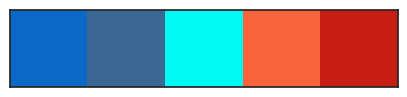

In [13]:
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

In [14]:
country_df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

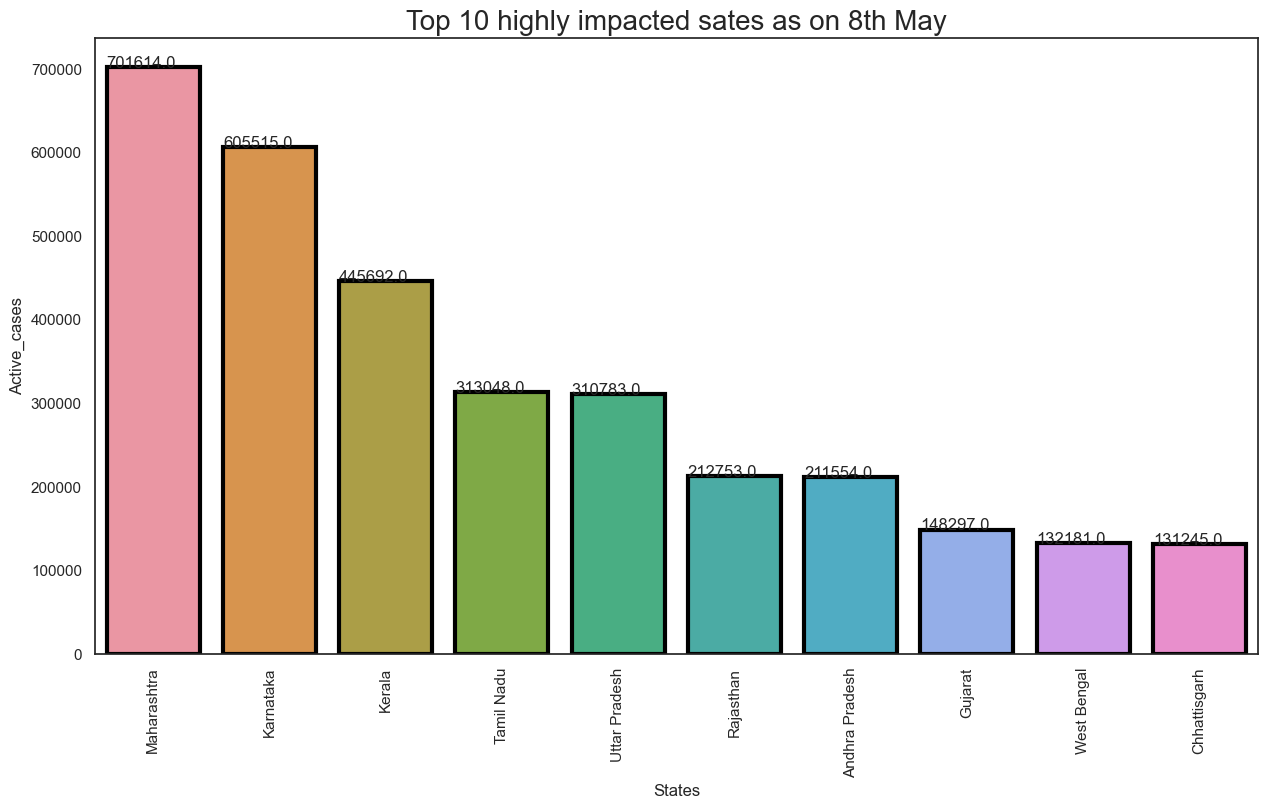

In [15]:
top_10=country_df.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()

fig=plt.figure(figsize=(15,8))
plt.title("Top 10 highly impacted sates as on 8th May", size=20)
ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=3, edgecolor='black')
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)

for i in ax.patches:
  ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

Text(0.5, 1.0, 'Active cases by States')

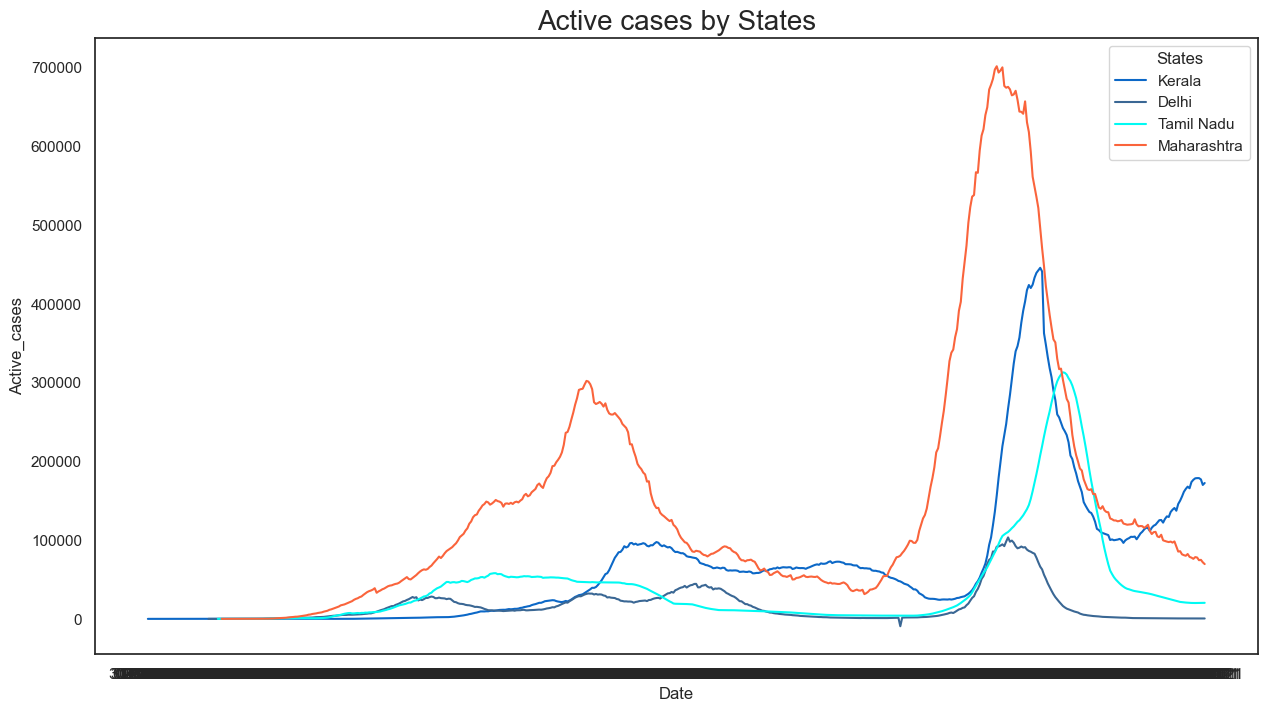

In [16]:
fig=plt.figure(figsize=(15,8))

ax=sns.lineplot(data=country_df[country_df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
ax.set_title("Active cases by States", size=20)

IndexError: index 40 is out of bounds for axis 0 with size 40

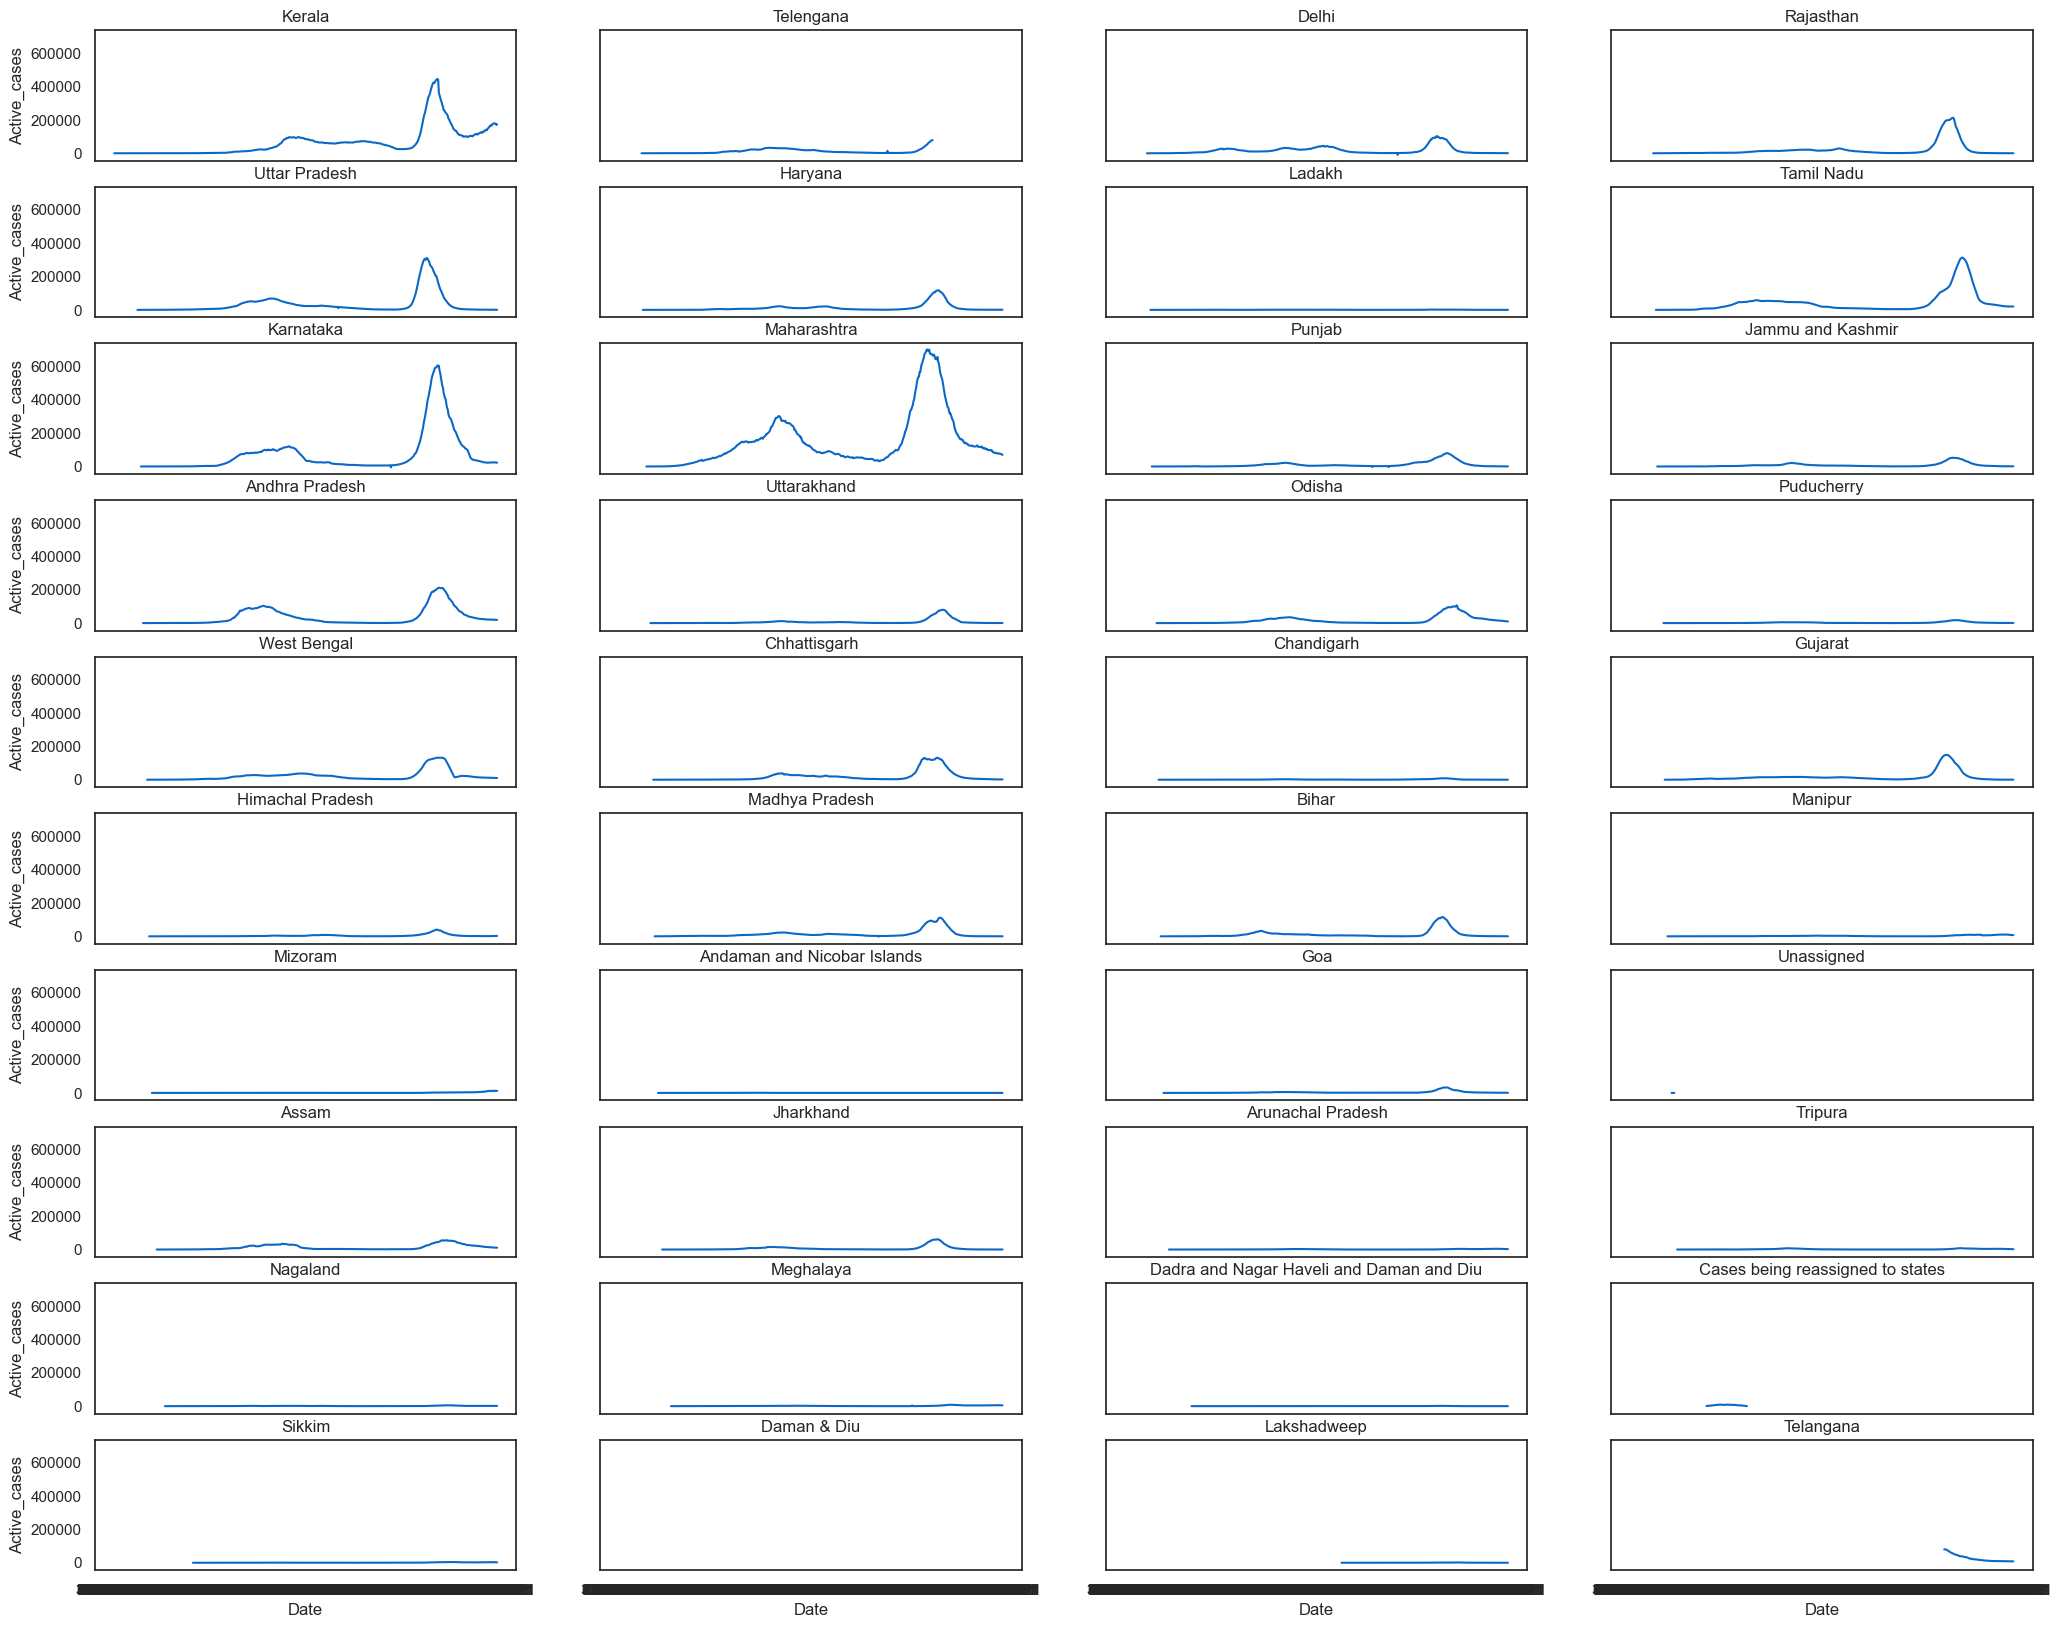

In [17]:
fig, ax=plt.subplots(nrows=10, ncols=4, figsize=[25,20], sharex=True, sharey=True)
ax=ax.flatten()

for i,s in enumerate(country_df['States'].unique()):
  data1=country_df[country_df['States']==s][['Date','Active_cases']]
  sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
  ax[i].set_title(s)

<Axes: xlabel='Date', ylabel='Deaths'>

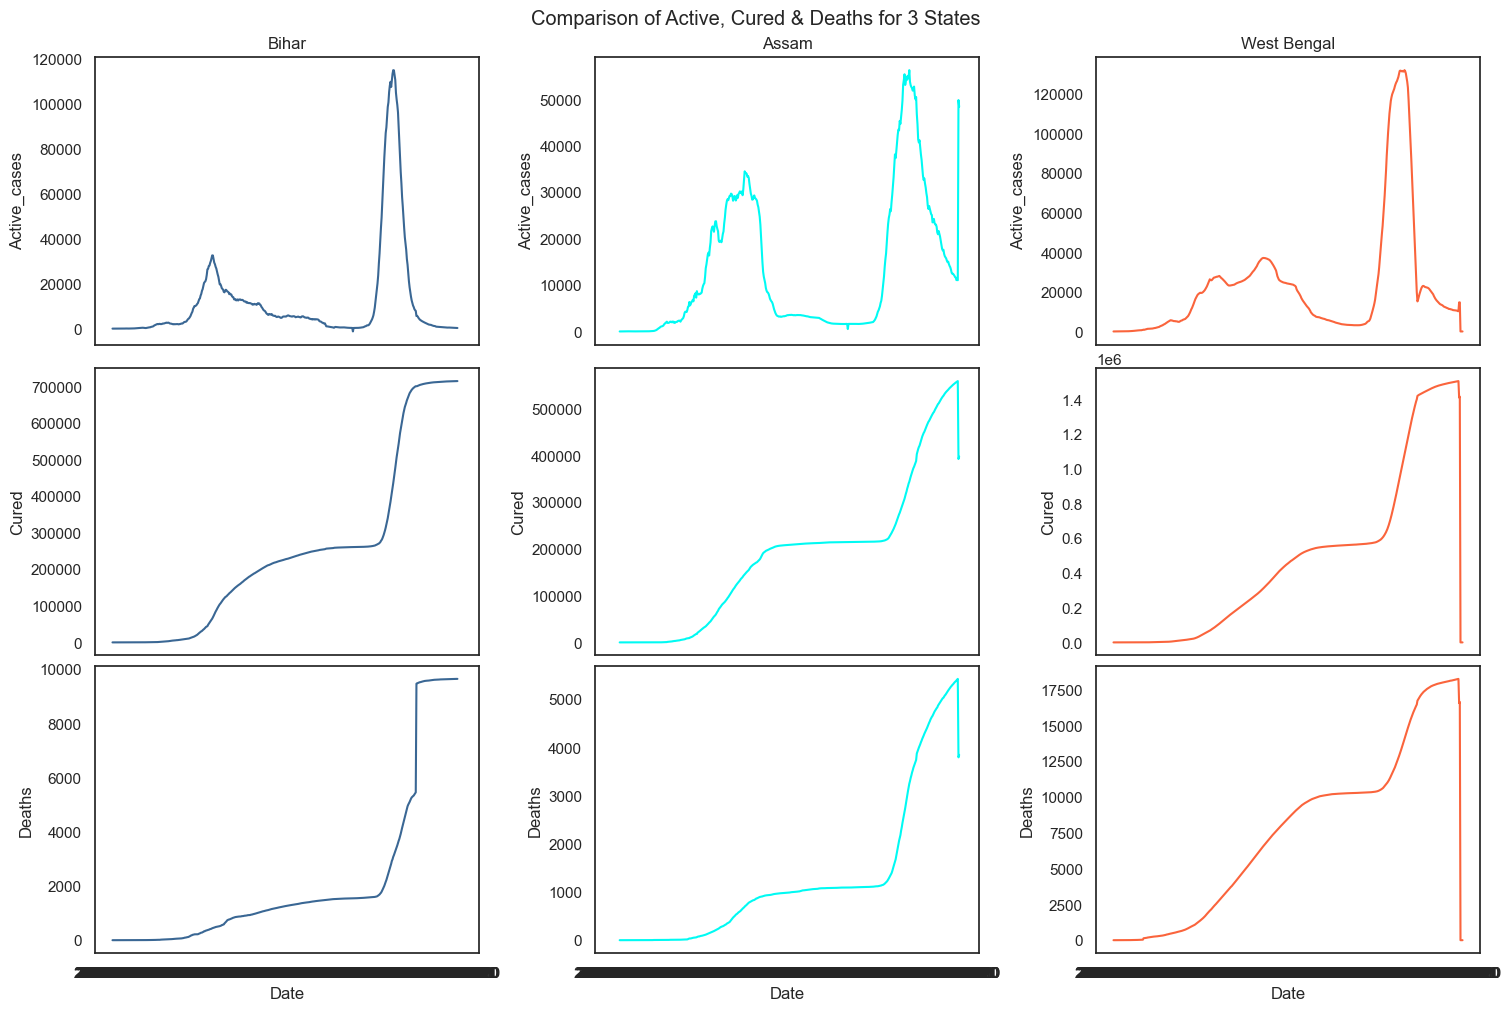

In [19]:
states=['Bihar', 'Assam', 'West Bengal']
bihar=country_df[country_df['States']=='Bihar']
assam=country_df[country_df['States']=='Assam']
wb=country_df[country_df['States']=='West Bengal']


fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")

sns.lineplot(data=bihar, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Bihar")
sns.lineplot(data=bihar, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=bihar, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])
    
sns.lineplot(data=assam, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Assam")
sns.lineplot(data=assam, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=assam, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=wb, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("West Bengal")
sns.lineplot(data=wb, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=wb, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

<Axes: xlabel='Deaths', ylabel='Density'>

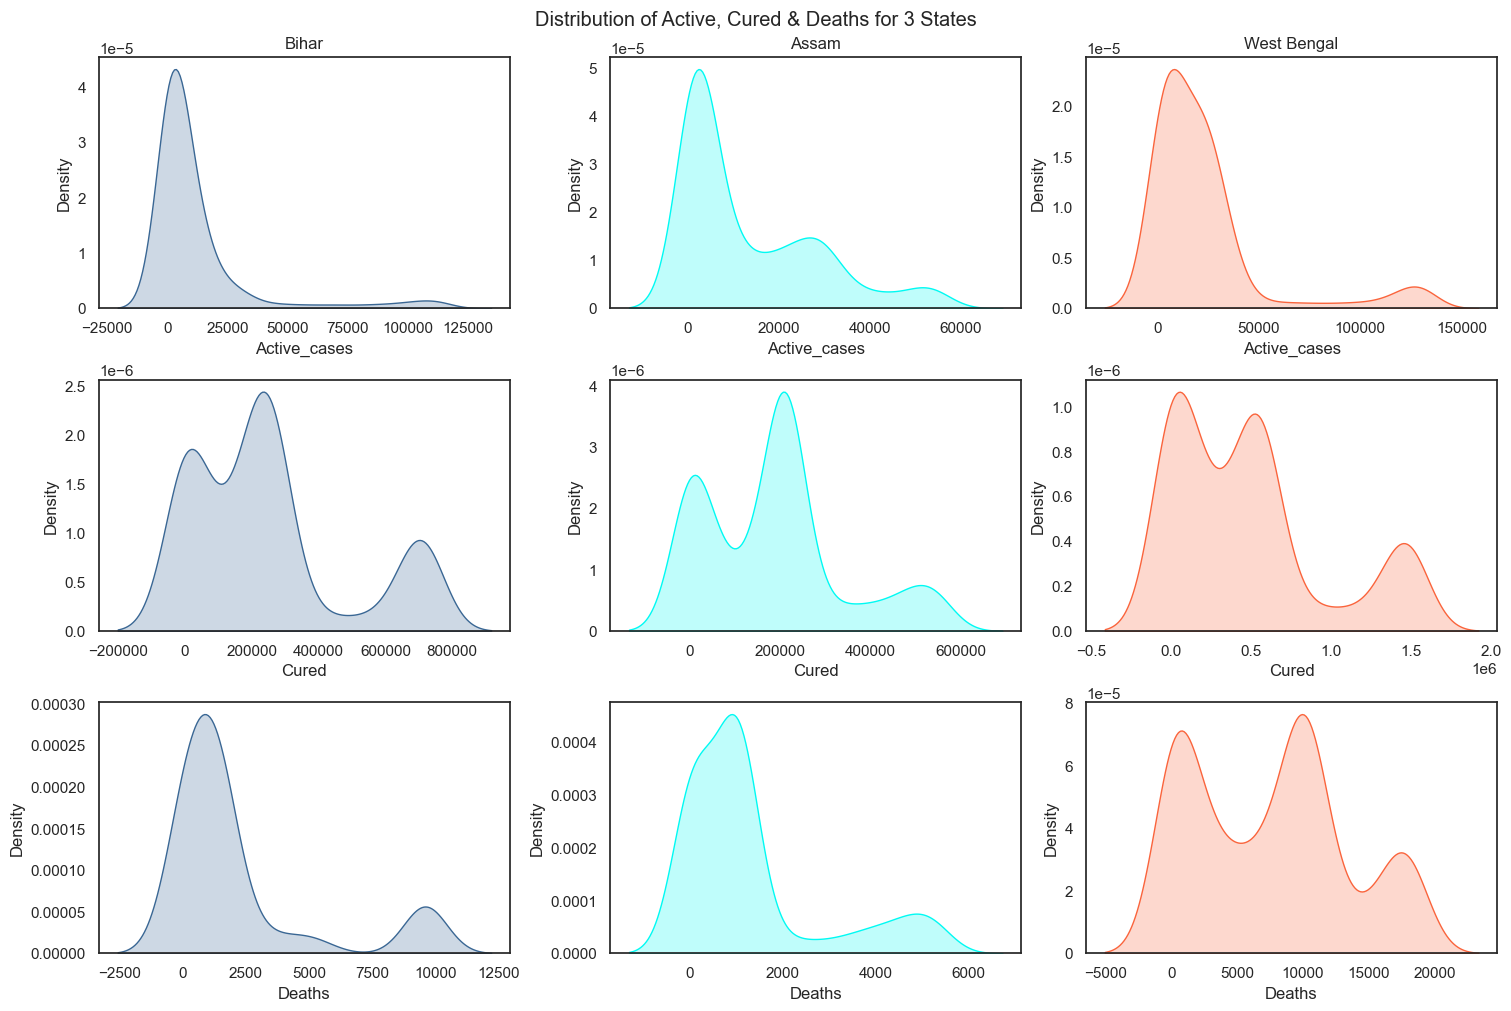

In [20]:
states=['Bihar', 'Assam', 'West Bengal']
bihar=country_df[country_df['States']=='Bihar']
assam=country_df[country_df['States']=='Assam']
wb=country_df[country_df['States']=='West Bengal']

fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=False, sharey=False, constrained_layout=True )
plt.suptitle("Distribution of Active, Cured & Deaths for 3 States")
    
sns.kdeplot(data=bihar['Active_cases'],ax=ax[0,0],color=colors[1], fill=True)
ax[0,0].set_title("Bihar")
sns.kdeplot(data=bihar['Cured'],  ax=ax[1,0],color=colors[1],fill=True)
sns.kdeplot(data=bihar['Deaths'], ax=ax[2,0], color=colors[1],fill=True)

sns.kdeplot(data=assam['Active_cases'], ax=ax[0,1], color=colors[2],fill=True)
ax[0,1].set_title("Assam")
sns.kdeplot(data=assam['Cured'], ax=ax[1,1], color=colors[2],fill=True)
sns.kdeplot(data=assam['Deaths'], ax=ax[2,1], color=colors[2],fill=True)

sns.kdeplot(data=wb['Active_cases'], ax=ax[0,2], color=colors[3],fill=True)
ax[0,2].set_title("West Bengal")
sns.kdeplot(data=wb['Cured'], ax=ax[1,2], color=colors[3],fill=True)
sns.kdeplot(data=wb['Deaths'], ax=ax[2,2], color=colors[3],fill=True)


In [21]:
median_states=country_df[country_df['States'].isin(['Bihar', 'Assam', 'West Bengal'])]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

C:\Users\JOYDEEP\AppData\Local\Temp\ipykernel_8372\12113145.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Assam,9137.500000,209048.500000,988.000000,213583.500000,4267.500000
Bihar,8928.500000,227197.500000,1256.000000,233845.500000,4181.000000
West Bengal,8923.500000,442843.500000,8296.000000,475716.500000,14705.500000


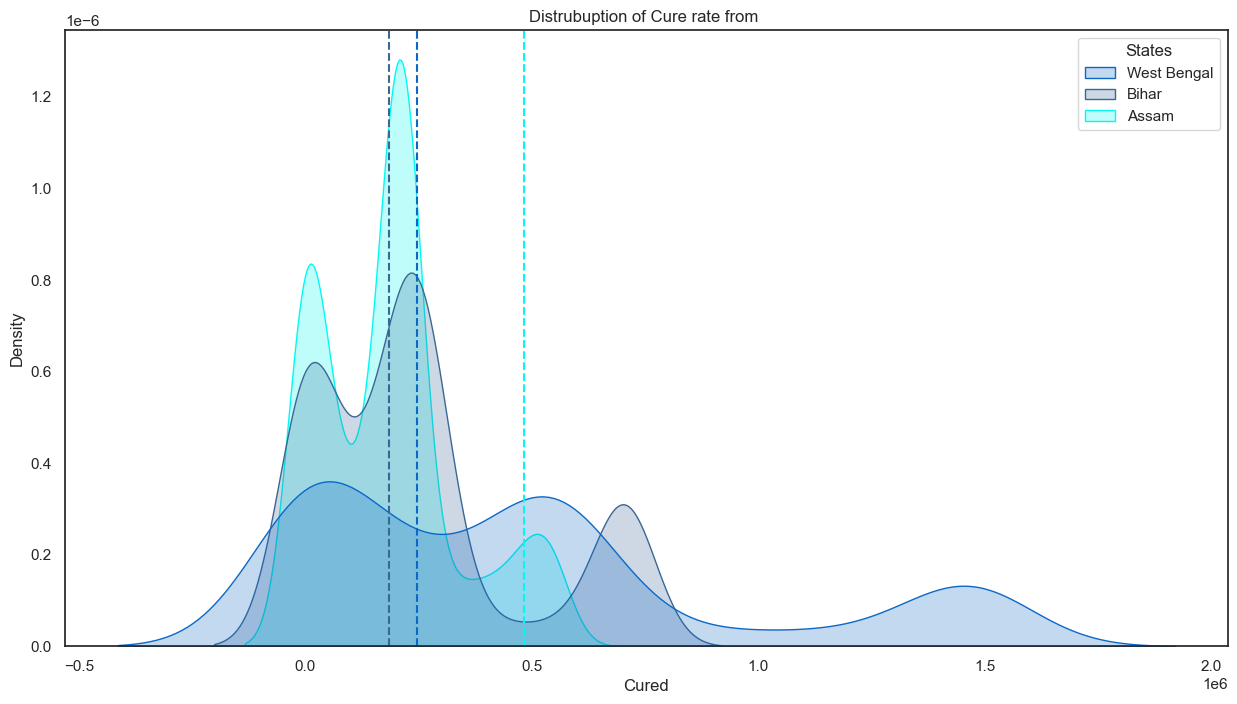

In [22]:
from scipy.stats import norm

fig=plt.figure(figsize=(15,8))
plt.title("Distrubuption of Cure rate from ")

ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Bihar', 'Assam', 'West Bengal'])],x='Cured', hue='States', fill=True)
ax.axvline(median_states[median_states['States']=='Bihar']['Cured'].mean(), ls='--', c=colors[0])
ax.axvline(median_states[median_states['States']=='Assam']['Cured'].mean(), ls='--', c=colors[1])
ax.axvline(median_states[median_states['States']=='West Bengal']['Cured'].mean(), ls='--', c=colors[2])

C:\Users\JOYDEEP\AppData\Local\Temp\ipykernel_8372\206366854.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Covid Info')

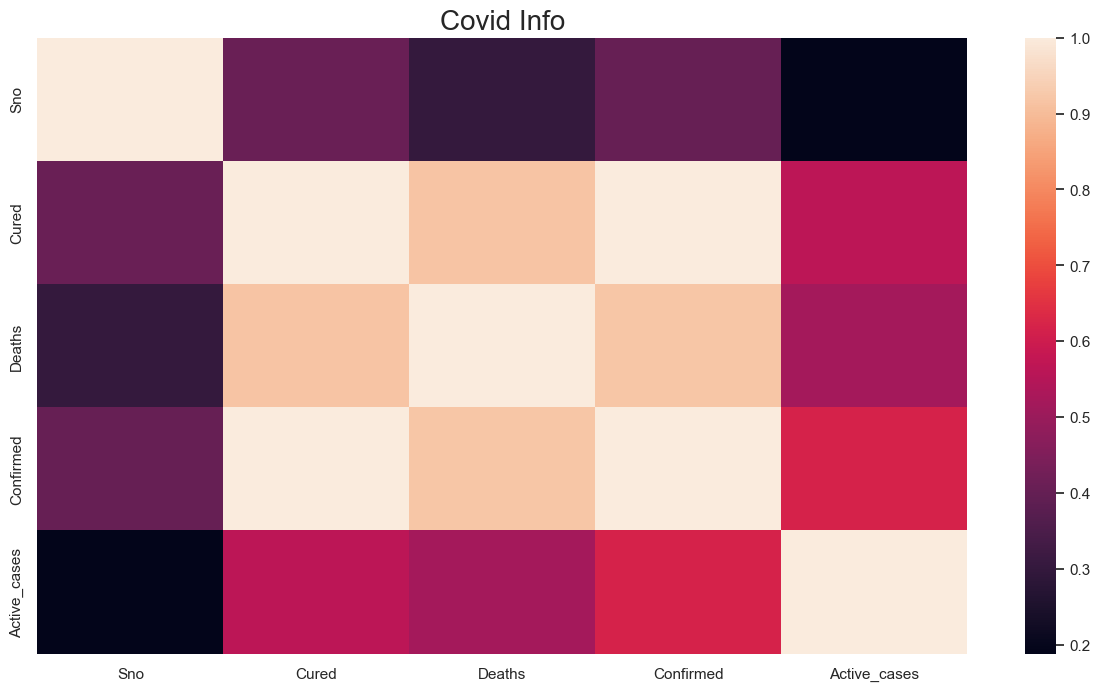

In [23]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(country_df.corr())
plt.title("Covid Info",size=20)

In [24]:
statewise = pd.pivot_table(country_df, values = ["Confirmed", "Deaths", "Cured"], index = "States", aggfunc = max)
statewise

,Confirmed,Cured,Deaths
States,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


In [25]:
statewise["Recovery_rate"] = statewise["Cured"]*100/statewise["Confirmed"]
statewise["Mortality_rate"] = statewise["Deaths"]*100/statewise["Confirmed"]
statewise.sort_values(by = "Confirmed", ascending=False)

,Confirmed,Cured,Deaths,Recovery_rate,Mortality_rate
States,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [26]:
vaccine_df=pd.read_csv("D:\covid_vaccine_statewise.csv")

In [27]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [28]:
vaccine_df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [29]:
vaccination = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)

In [30]:
vaccination.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [31]:
vaccine = vaccine_df[vaccine_df.State!='India']
vaccine

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
